## Alunos

> - Andreus Jartã Timm
> - Kesley Jorge dos Santos
> - Priscila Alvez Costa

# Trabalho Prático
-------------

**Objetivo**: Nosso objetivo é treinar os modelos aprendidos em sala de aula e ver qual
modelo é o mais eficaz neste dataset

**Banco de Dados**: Bank Loan Approval

[Link para o banco](https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc)

Descrição do banco:
> Este banco de dados contem registros de 5000 usuários de banco, e a informação se o empréstimo foi aprovado está  na coluna `Personal Loan`.
> 
> O banco de dados possui 14 variáveis:
> 
> * `ID`: ID do cliente
> * `Age`: Idade do cliente
> * `Experience`: Experiência do cliente
> * `Income`: Renda do cliente
> * `ZipCode`: CEP de residência do cliente
> * `Family`: Número de membros da família do cliente
> * `CCAvg`: Pontuação média do cartão de crédito
> * `Education`: Educação do cliente
> * `Mortgage`: Hipoteca contratada ou não pelo cliente
> * `Personal Loan`: 0 significa Empréstimo pessoal não concedido, 1 significa Empréstimo pessoal concedido
> * `Securities Account`: Se o cliente possui ou não uma conta de títulos
> * `CD Account`: Possui ou não possui uma conta de certificado de depósitos CD é uma ferramenta de poupança de baixo risco
> * `Online`: Possui ou não possui banco online
> * `Credit Card`: Possui ou não possui um cartão de crédito

### 1. Carga do banco
--------------------

In [518]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


df = pd.read_csv('../dataset/bankloan.csv')

### 1.1 - Exibir as primeiras linhas do DataFrame

In [519]:
print(df.head())

   ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


### 1.2 - Exibir as ultimas linhas do DataFrame

In [520]:
print(df.tail())

        ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  \
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal.Loan  Securities.Account  CD.Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           

### 1.3 - Verificando dados faltantes

In [521]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

### 1.4 - Verificando dados duplicados

In [522]:
df.duplicated().sum()

0

### 1.5 Remoção o ID e ZIP.Code que são irrelevantes

In [523]:
df = df.drop(columns=['ID', 'ZIP.Code'])

### Verificando experiências com valores negativos

In [524]:
negative_experience = df[df['Experience'] < 0]
print(negative_experience)

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
89     25          -1     113       4   2.30          3         0   
226    24          -1      39       2   1.70          2         0   
315    24          -2      51       3   0.30          3         0   
451    28          -2      48       2   1.75          3        89   
524    24          -1      75       4   0.20          1         0   
536    25          -1      43       3   2.40          2       176   
540    25          -1     109       4   2.30          3       314   
576    25          -1      48       3   0.30          3         0   
583    24          -1      38       2   1.70          2         0   
597    24          -2     125       2   7.20          1         0   
649    25          -1      82       4   2.10          3         0   
670    23          -1      61       4   2.60          1       239   
686    24          -1      38       4   0.60          2         0   
793    24          -2     150     

### Fazendo com que estes valores negativos virem positivos

In [525]:
df['Experience'] = abs(df['Experience'])

negative_experience = df[df['Experience'] < 0]
print('teste',negative_experience)

teste Empty DataFrame
Columns: [Age, Experience, Income, Family, CCAvg, Education, Mortgage, Personal.Loan, Securities.Account, CD.Account, Online, CreditCard]
Index: []


Levando em consideração que é impossível ter experiência negativa os valores foram convertidos para positivos

### 1.6 Visualização da alteração

In [526]:
# Dataset sem os campos desnecessários
print(df.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal.Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities.Account  CD.Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


### 1.7 - Analisar as features descritivas

In [527]:
print(df.describe())

               Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.134600    73.774200     2.396400     1.937938   
std      11.463166    11.415189    46.033729     1.147663     1.747659   
min      23.000000     0.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.700000   
50%      45.000000    20.000000    64.000000     2.000000     1.500000   
75%      55.000000    30.000000    98.000000     3.000000     2.500000   
max      67.000000    43.000000   224.000000     4.000000    10.000000   

         Education     Mortgage  Personal.Loan  Securities.Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000       0.000000       

In [528]:
df.shape

(5000, 12)

In [529]:
# Criação do gráfico de barras com Plotly
fig = px.histogram(df, x='Personal.Loan', title='Distribuição da variável-alvo', 
                    nbins=2)

# Ajustes adicionais no layout
fig.update_layout(
    xaxis_title="Personal Loan",
    yaxis_title="Contagem",
    bargap=0.2
)

# Exibição do gráfico
fig.show()

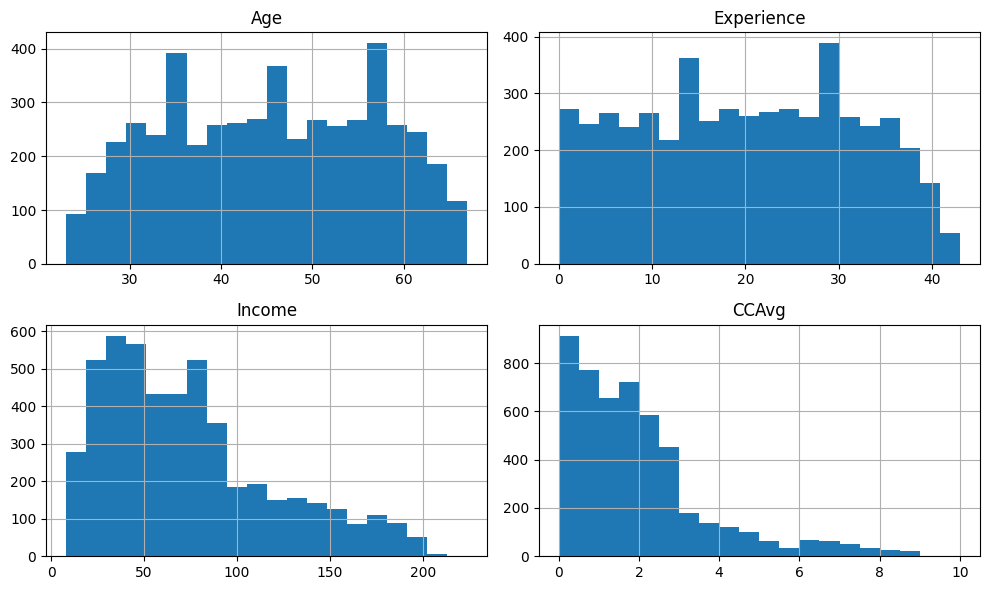

In [530]:
# Exemplo de histogramas para variáveis numéricas
df[['Age', 'Experience', 'Income', 'CCAvg']].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

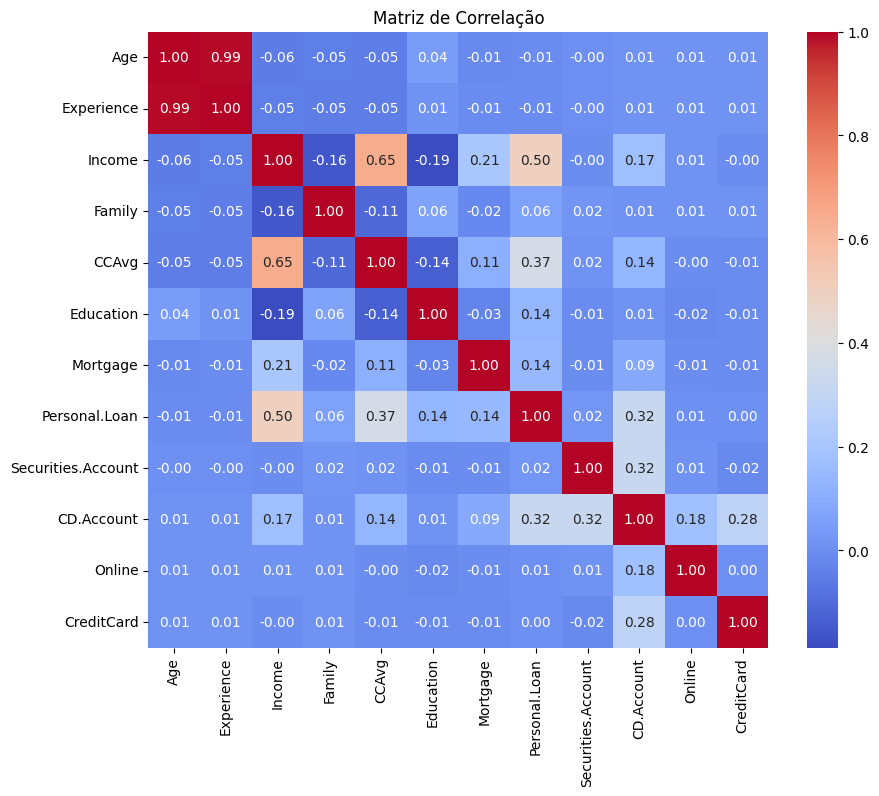

In [531]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

## 2. Quebra do banco
--------------------

### 2.1 - Separando os dados entre features (X) e target (y)

In [532]:
X = df.drop(columns=['Personal.Loan'])
y = df['Personal.Loan']

### 2.2 - Separar o conjunto de dados em treino (80%) e teste (20%)

In [533]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3 Fazendo a normalização dos dados

In [534]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Primeiro modelo
--------------------

### 3.1 Regressão logistica

In [535]:
log_reg = LogisticRegression(random_state=4)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=4)

In [536]:
pred_class = log_reg.predict(X_test_scaled)

In [537]:
# Fazer previsões e avaliar o modelo
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_log_reg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log_reg))



Regressão Logística
Acurácia: 0.954
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.86      0.68      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.83      0.86      1000
weighted avg       0.95      0.95      0.95      1000



#### Interpretação de coeficientes

In [538]:
# # Extraindo os coeficientes do modelo
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

# Criando uma lista para armazenar as informações
data = []

# Preenchendo a lista com as interpretações
for feature, coef in zip(X.columns, coefficients):
    # Calculando as odds (razão de chances)
    odds = np.exp(coef)
    data.append([feature, coef, odds])

# Criando um DataFrame com as informações
tabela_coeficientes = pd.DataFrame(data, columns=['Feature', 'Coeficiente', 'Odds'])

# Exibindo a tabela
print(tabela_coeficientes)

               Feature  Coeficiente       Odds
0                  Age     0.031136   1.031626
1           Experience     0.095264   1.099949
2               Income     2.396092  10.980180
3               Family     0.814248   2.257478
4                CCAvg     0.188620   1.207582
5            Education     1.330977   3.784740
6             Mortgage     0.055273   1.056829
7   Securities.Account    -0.266422   0.766116
8           CD.Account     0.893555   2.443801
9               Online    -0.303377   0.738321
10          CreditCard    -0.552986   0.575230


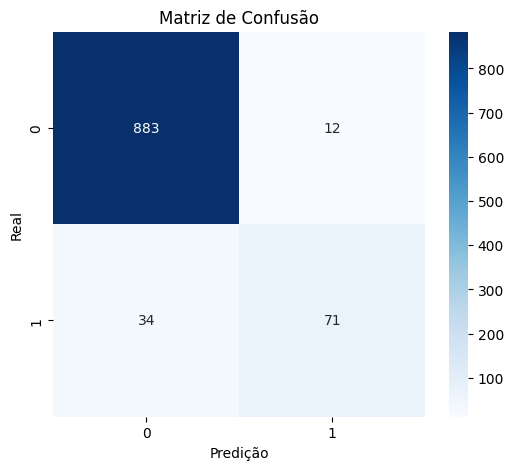

Matriz de Confusão:
[[883  12]
 [ 34  71]]


In [539]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_log_reg)

# Plotando a Matriz de Confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

# Imprimir a matriz de confusão no terminal
print("Matriz de Confusão:")
print(cm)

Matriz de confusão


||Classificado 0|Classificado 1|
|---|---|---|
|Real 0| 883| 12|
|Real 1| 33| 72|

Precisao 0 = 883/(883+12)

Recall 0 = 883/(883+72)

In [540]:
883/(883+33), 883/(883+12)

(0.9639737991266376, 0.9865921787709497)

In [541]:
recall_score(y_test, pred_class)

0.6761904761904762

In [542]:
recall_score(y_test, pred_class, pos_label=0)

0.9865921787709497

In [543]:
pred_prob = log_reg.predict_proba(X_test_scaled)

In [544]:
roc_auc = roc_auc_score(y_test, pred_prob[:, 1])
roc_auc


0.9682575152966215

In [545]:
pred_prob[1, :]

array([0.74548717, 0.25451283])

In [546]:
(pred_prob[:,1] > .5) - pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [547]:
pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

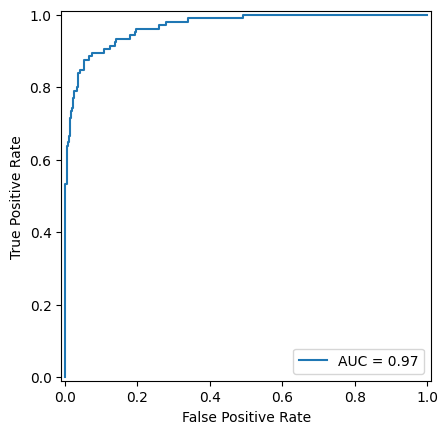

In [548]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [549]:
np.arange(0, 1, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [550]:
# Gerando previsões de probabilidade
predict_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [551]:
# Inicializando a lista para armazenar as informações
results = []

In [552]:
# Inicializando a acurácia atual e o limiar ótimo
acc_atual = 0
thr_otimo = 0

In [553]:
# Calculando acurácia para diferentes limiares
for thr in np.arange(0, 1, 0.1):
    # Aplicando o limiar para fazer a previsão binária
    y_pred_thr = (predict_proba >= thr).astype(int)
    
    # Calculando a acurácia
    acc = accuracy_score(y_test, y_pred_thr)
    
    # Adicionando os resultados à lista
    results.append([thr, acc])
    
    # Atualizando o limiar ótimo, se necessário
    if acc >= acc_atual:
        thr_otimo = thr
        acc_atual = acc

# Convertendo os resultados para um DataFrame
df_results = pd.DataFrame(results, columns=['Limiar', 'Acurácia'])

# Exibindo a tabela com os limiares e acurácias
print(df_results)

# Exibindo o limiar ótimo encontrado
print(f"Limiar ótimo: {thr_otimo}, Acurácia ótima: {acc_atual:.4f}")

   Limiar  Acurácia
0     0.0     0.105
1     0.1     0.887
2     0.2     0.935
3     0.3     0.949
4     0.4     0.956
5     0.5     0.954
6     0.6     0.950
7     0.7     0.949
8     0.8     0.937
9     0.9     0.930
Limiar ótimo: 0.4, Acurácia ótima: 0.9560


In [554]:
import plotly.express as px

acc_lista = []
for thr in np.arange(0, 1, .0001):
  acc_lista.append(accuracy_score(y_test, predict_proba>=thr))

px.line(x=np.arange(0, 1, .0001), y=acc_lista)

### 3.2 Arvore de decisão

In [555]:
# Treinar o modelo de Árvore de Decisão
tree = DecisionTreeClassifier(max_depth=4, random_state=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=4)

In [556]:
# Prever no conjunto de teste
y_pred_tree = tree.predict(X_test)

# Avaliação do modelo de Árvore de Decisão
print(classification_report(y_test, y_pred_tree))

# Importância das features
importances = tree.feature_importances_
features_importantes = sorted(zip(importances, X.columns), reverse=True)
print("Duas features mais importantes:", features_importantes[:2])

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.97      0.87      0.91       105

    accuracy                           0.98      1000
   macro avg       0.98      0.93      0.95      1000
weighted avg       0.98      0.98      0.98      1000

Duas features mais importantes: [(0.4209707351757685, 'Education'), (0.33334340211579494, 'Income')]


In [557]:
# Criando um DataFrame com as importâncias das features e seus nomes
features_df = pd.DataFrame(features_importantes, columns=["Importância", "Feature"])

# Calculando os "odds" como a exponencial da importância (como uma adaptação)
features_df["Odds"] = np.exp(features_df["Importância"])


# Exibindo a tabela com as features, importâncias e odds
print(features_df)

    Importância             Feature      Odds
0      0.420971           Education  1.523440
1      0.333343              Income  1.395626
2      0.179736              Family  1.196901
3      0.043675               CCAvg  1.044643
4      0.016503          CD.Account  1.016640
5      0.005772                 Age  1.005789
6      0.000000  Securities.Account  1.000000
7      0.000000              Online  1.000000
8      0.000000            Mortgage  1.000000
9      0.000000          Experience  1.000000
10     0.000000          CreditCard  1.000000


In [558]:
pred_class = tree.predict(X_test)

In [559]:
recall_score(y_test, pred_class)

0.8666666666666667

In [560]:
recall_score(y_test, pred_class, pos_label=0)

0.9966480446927374

In [561]:
roc_auc = roc_auc_score(y_test, pred_class)
roc_auc

0.9316573556797021

In [562]:
pred_proba = tree.predict_proba(X_test)[:,1]

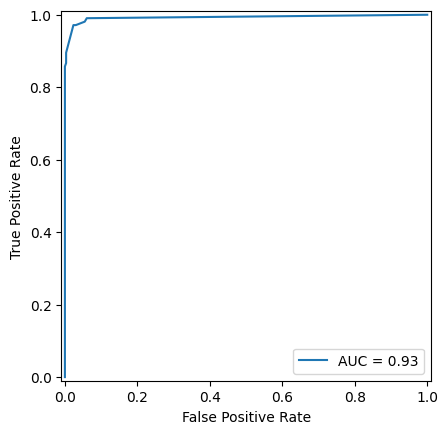

In [563]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [564]:
predict_proba = tree.predict_proba(X_test)[:, 1]
acc_atual = 0
thr_otimo = 0
for thr in np.arange(0, 1, .1):
  acc = accuracy_score(y_test, predict_proba>=thr)
  if acc >= acc_atual:
    thr_otimo = thr
    acc_atual = acc

In [565]:
acc_atual

0.986

In [566]:
thr_otimo

0.5

In [567]:
acc_lista = []
for thr in np.arange(0, 1, .1):
  acc_lista.append(accuracy_score(y_test, predict_proba>=thr))

px.line(x=np.arange(0, 1, .1), y=acc_lista)

### 3.3 Random Forest

In [568]:
# Criando o modelo random forest
random = RandomForestClassifier(random_state=4)

# Treinando o modelo com os dados de treino
random.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = random.predict(X_test)

# Avaliando a performance do modelo com as métricas de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.99      0.92      0.96       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [569]:
# Matriz de confusão
print(confusion_matrix(y_test, y_pred))

[[894   1]
 [  8  97]]


In [570]:
importances = random.feature_importances_
features_importantes = sorted(zip(importances, X.columns), reverse=True)

print("Duas features mais importantes:", features_importantes[:2])

Duas features mais importantes: [(0.3420325057676124, 'Income'), (0.19286871577012432, 'Education')]


In [571]:
# Criando uma lista com os nomes das características (features)
features = X_train.columns  # ou use o nome das variáveis se for o caso

# Criando um DataFrame com as importâncias
importance_df = pd.DataFrame({
    'Feature': features,
    'Importância': importances
})

# Ordenando as importâncias em ordem decrescente
importance_df = importance_df.sort_values(by='Importância', ascending=False)

# Calculando os odds para cada feature (usando importância como aproximação)
importance_df['Odds'] = np.exp(importance_df['Importância'])

# Exibindo a tabela com as características, importâncias e odds
print(importance_df)

               Feature  Importância      Odds
2               Income     0.342033  1.407806
5            Education     0.192869  1.212724
4                CCAvg     0.159614  1.173058
3               Family     0.110203  1.116505
8           CD.Account     0.052506  1.053909
1           Experience     0.041843  1.042731
0                  Age     0.041116  1.041973
6             Mortgage     0.038197  1.038936
10          CreditCard     0.008860  1.008900
9               Online     0.007916  1.007948
7   Securities.Account     0.004843  1.004855


### 3.4 XGBoost

In [572]:
model_xgboost = XGBClassifier(objective='binary:logistic', max_depth=5,
                      learning_rate=.1,
                      n_estimators=150, random_state=4)
model_xgboost.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-logloss:0.29255
[1]	validation_0-logloss:0.25407
[2]	validation_0-logloss:0.22469
[3]	validation_0-logloss:0.20019
[4]	validation_0-logloss:0.18012
[5]	validation_0-logloss:0.16290
[6]	validation_0-logloss:0.14818
[7]	validation_0-logloss:0.13538
[8]	validation_0-logloss:0.12444
[9]	validation_0-logloss:0.11457
[10]	validation_0-logloss:0.10551
[11]	validation_0-logloss:0.09750
[12]	validation_0-logloss:0.09040
[13]	validation_0-logloss:0.08414
[14]	validation_0-logloss:0.07864
[15]	validation_0-logloss:0.07380
[16]	validation_0-logloss:0.06945
[17]	validation_0-logloss:0.06560
[18]	validation_0-logloss:0.06218
[19]	validation_0-logloss:0.05861
[20]	validation_0-logloss:0.05580
[21]	validation_0-logloss:0.05301
[22]	validation_0-logloss:0.05083
[23]	validation_0-logloss:0.04894
[24]	validation_0-logloss:0.04708
[25]	validation_0-logloss:0.04530
[26]	validation_0-logloss:0.04374
[27]	validation_0-logloss:0.04227
[28]	validation_0-logloss:0.04105
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=4, ...)

In [573]:
predict_proba = model_xgboost.predict_proba(X_test)

In [574]:
xg_pred_class = model_xgboost.predict(X_test)
print(classification_report(y_test, xg_pred_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.97      0.93      0.95       105

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



In [575]:
importances = model_xgboost.feature_importances_
features_importantes = sorted(zip(importances, X.columns), reverse=True)
print("Duas features mais importantes:", features_importantes[:2])

Duas features mais importantes: [(0.37735775, 'Education'), (0.26373214, 'Income')]


# 4 Exibindo resultados

In [576]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Definição dos modelos
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree,
    "Random Forest": random,
    "XGBoost": model_xgboost
}

# Inicializando um dicionário para armazenar os resultados
results = {}

# Calculando as métricas para cada modelo
for name, model in models.items():
    # Para a regressão logística, é necessário usar X_test_scaled
    if name == "Logistic Regression":
        y_pred = model.predict(X_test_scaled)  # Previsões com dados escalados
    else:
        y_pred = model.predict(X_test)  # Previsões com dados não escalados para outros modelos

    # Calculando as métricas
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Armazenando os resultados
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# Convertendo os resultados para um DataFrame para melhor visualização
results_df = pd.DataFrame(results).T

# Exibindo os resultados
print(results_df)


                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression     0.954   0.855422  0.676190  0.755319  0.831391
Decision Tree           0.983   0.968085  0.866667  0.914573  0.931657
Random Forest           0.991   0.989796  0.923810  0.955665  0.961346
XGBoost                 0.990   0.970297  0.933333  0.951456  0.964991


### Motivo de escolha das métricas

* Precisão: É como medir o quanto as respostas do modelo estão certas, entre todas as vezes que ele deu uma resposta positiva.
* Recall: Verifica se o modelo consegue encontrar todos os casos importantes, ou seja, todos os positivos.
* F1-Score: É uma mistura da precisão e do recall, usada quando é difícil escolher qual dos dois é mais importante.
* ROC-AUC: Mostra quão bom o modelo é em geral, considerando tanto as respostas certas quanto os erros.

# 5 Comparação dos modelos

In [577]:
# Transformando o DataFrame em um formato longo (long format) para o Plotly
results_long = results_df.reset_index().melt(id_vars="index", var_name="Métrica", value_name="Valor")
results_long.rename(columns={"index": "Modelo"}, inplace=True)

# Criando o gráfico de barras com Plotly
fig = px.bar(
    results_long,
    x="Modelo",
    y="Valor",
    color="Métrica",
    barmode="group",
    title="Comparação de Modelos",
    text="Valor",
    height=600,  # Altura do gráfico
    width=1800   # Largura do gráfico
)

# Ajustando layout e estilo
fig.update_layout(
    xaxis_title="Modelo",
    yaxis_title="Valor da Métrica",
    legend_title="Métrica",
    xaxis_tickangle=45,  # Rotação dos rótulos no eixo X
)

# Exibindo o gráfico
fig.show()

In [578]:
# Melhor modelo em Acurácia, Precisão, Recall e F1-Score:
for metric in ["Accuracy","Precision", "Recall", "F1-Score", "ROC-AUC"]:
    print(f"\nComparação baseada em {metric}:")
    best_model = max(results, key=lambda model: results[model][metric])
    print(f"O modelo com melhor desempenho no {metric} de aprovação de empréstimo é: {best_model}")


Comparação baseada em Accuracy:
O modelo com melhor desempenho no Accuracy de aprovação de empréstimo é: Random Forest

Comparação baseada em Precision:
O modelo com melhor desempenho no Precision de aprovação de empréstimo é: Random Forest

Comparação baseada em Recall:
O modelo com melhor desempenho no Recall de aprovação de empréstimo é: XGBoost

Comparação baseada em F1-Score:
O modelo com melhor desempenho no F1-Score de aprovação de empréstimo é: Random Forest

Comparação baseada em ROC-AUC:
O modelo com melhor desempenho no ROC-AUC de aprovação de empréstimo é: XGBoost


# 6 Conclusão:

> Com base nas comparações das métricas, o modelo Random Forest é o mais equilibrado para a tarefa de aprovação de empréstimos, pois:
>
> * Ele tem o melhor desempenho em Accuracy, Precision, e F1-Score, que são métricas cruciais para modelos de classificação, especialmente quando se busca um bom equilíbrio entre a acurácia e a minimização de falsos positivos.
> * Embora o XGBoost tenha um desempenho superior em Recall e ROC-AUC, o Random Forest ainda se destaca em termos de equilíbrio geral.
>
>  O modelo Random Forest é a melhor escolha para esse caso, já que ele oferece um excelente compromisso entre detectar corretamente os empréstimos aprovados e minimizar falsos positivos.
